In [16]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [74]:
# write your code for task 0 here
file_path = os.path.join("C:\\Users\\1\\projects\\py-adult-data-analysis\\data\\adult.csv")

dt = pd.read_csv(file_path, index_col=[0])
dt.replace("?", np.nan, inplace=True)
dt.dropna(inplace=True)

dt[(dt["salary"] == ">50K") & (dt["salary K$"] <= 50)]
dt[(dt["salary"] == "<=50K") & (dt["salary K$"] > 50)]

dt.head()


Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
Index: []
Empty DataFrame
Columns: [age, workclass, education, marital-status, occupation, relationship, race, sex, hours-per-week, native-country, salary, salary K$]
Index: []


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25


# Task 1
Print the count of men and women in the dataset.

In [68]:
# write your code for task 1 here
dt["sex"].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [51]:
# write your code for task 2 here
np.average(dt[dt["sex"] == "Male"]["age"])

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [62]:
# write your code for task 3 here
percentage = len(dt[dt["native-country"] == "Poland"]) / len(dt) * 100
percentage

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [73]:
# write your code for task 4 here
less_than_fifty = dt[dt["salary"] == "<=50K"]
more_than_fifty = dt[dt["salary"] == ">50K"]

print(more_than_fifty["age"].mean(), more_than_fifty["age"].std())
print(less_than_fifty["age"].mean(), less_than_fifty["age"].std())

43.95911028236548 10.269632835673852
36.60806038668668 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [82]:
# write your code for task 5 here
condition = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]

dt[(~dt["education"].isin(condition)) & (dt["salary"] == ">50K")]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [88]:
# write your code for task 6 here
dt.groupby(dt["education"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

<Axes: title={'center': 'Salary of Non-Married Men'}, ylabel='count'>

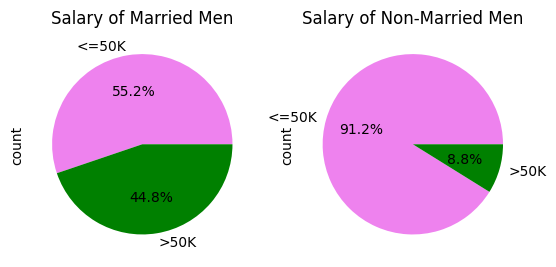

In [126]:
# write your code for task 7 here
married = dt[
    (dt["sex"] == "Male") & 
    (dt["marital-status"].str.startswith("Married"))
]["salary"].value_counts()

not_married = dt[
    (dt["sex"] == "Male") & 
    (~dt["marital-status"].str.startswith("Married"))
]["salary"].value_counts()

plt.subplot(1, 2, 1)
plt.title("Salary of Married Men")
married.plot.pie(autopct="%1.1f%%", colors=["violet", "green"])

plt.subplot(1, 2, 2)
plt.title("Salary of Non-Married Men")
not_married.plot.pie(autopct="%1.1f%%", colors=["violet", "green"])



# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [127]:
# write your code for task 8 here
max_hour_per_week = dt["hours-per-week"].max()
result = (dt["hours-per-week"] == max_hour_per_week).sum()
result

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [128]:
# write your code for task 9 here
pd.get_dummies(dt).corr()

,age,hours-per-week,salary K$,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,salary_<=50K,salary_>50K
age,1.000000,0.101599,0.208203,0.056626,0.068256,-0.210491,0.111039,0.150429,0.014805,0.015337,...,0.000024,0.001923,-0.007879,-0.004940,0.007868,0.016259,-0.017775,0.000657,-0.241998,0.241998
hours-per-week,0.101599,1.000000,0.196378,0.005229,0.001612,-0.095533,0.126254,0.087835,-0.032976,-0.014781,...,0.000689,0.014328,-0.000305,0.012846,-0.007566,0.010673,-0.010381,0.006983,-0.229480,0.229480
salary K$,0.208203,0.196378,1.000000,0.050512,0.025856,-0.098187,0.119222,0.019587,0.002678,-0.010522,...,-0.001498,-0.006514,0.016939,-0.000891,-0.003442,0.034000,-0.014737,0.008560,-0.853894,0.853894
workclass_Federal-gov,0.056626,0.005229,0.050512,1.000000,-0.048728,-0.302194,-0.034520,-0.053995,-0.037804,-0.003871,...,-0.003431,-0.004795,-0.006708,-0.004266,-0.004390,0.017541,-0.000004,-0.004139,-0.057394,0.057394
workclass_Local-gov,0.068256,0.001612,0.025856,-0.048728,1.000000,-0.456267,-0.052120,-0.081525,-0.057078,-0.005845,...,-0.005181,-0.013175,-0.003091,-0.006441,-0.001255,0.032937,-0.003952,-0.000550,-0.028673,0.028673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_United-States,0.016259,0.010673,0.034000,0.017541,0.032937,-0.049809,0.007350,0.014520,0.025370,0.001269,...,-0.061442,-0.156254,-0.120121,-0.076390,-0.078606,1.000000,-0.148334,-0.074108,-0.040204,0.040204
native-country_Vietnam,-0.017775,-0.010381,-0.014737,-0.000004,-0.003952,0.009369,-0.004973,-0.003405,-0.006128,-0.000994,...,-0.000881,-0.002240,-0.001722,-0.001095,-0.001127,-0.148334,1.000000,-0.001062,0.018215,-0.018215
native-country_Yugoslavia,0.000657,0.006983,0.008560,-0.004139,-0.000550,0.003861,0.003343,-0.001701,-0.004848,-0.000496,...,-0.000440,-0.001119,-0.000860,-0.000547,-0.000563,-0.074108,-0.001062,1.000000,-0.006718,0.006718
salary_<=50K,-0.241998,-0.229480,-0.853894,-0.057394,-0.028673,0.117218,-0.137646,-0.025575,-0.009752,0.012406,...,0.002964,0.005812,-0.017571,0.003979,0.007788,-0.040204,0.018215,-0.006718,1.000000,-1.000000
